In [1]:
library(devtools)
library(ggridges)
set.seed(1)

load_all("../../../hmmTMB")

Loading required package: usethis

ℹ Loading hmmTMB
Loading required package: R6

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.9-3. For overview type 'help("mgcv-package")'.

Loading required package: TMB

Loading required package: ggplot2



In [67]:
## ------------------------------------------------------------------
## 1.  Observation-key  →  distribution name  (unchanged)
## ------------------------------------------------------------------
dists <- list(
  beta_obs       = "beta",
  binom_obs      = "binom",
  # cat_obs        = "cat3",
  dir_obs        = "dir",
  exp_obs        = "exp",
  foldednorm_obs = "foldednorm",
  gamma_obs      = "gamma",
  gamma2_obs     = "gamma2",
  lnorm_obs      = "lnorm",
  mvnorm_obs     = "mvnorm",
  nbinom_obs     = "nbinom",
  nbinom2_obs    = "nbinom2",
  norm_obs       = "norm",
  pois_obs       = "pois",
  t_obs          = "t",
  truncnorm_obs  = "truncnorm",
  tweedie_obs    = "tweedie",
  vm_obs         = "vm",
  weibull_obs    = "weibull",
  wrpcauchy_obs  = "wrpcauchy",
  zibinom_obs    = "zibinom",
  zigamma_obs    = "zigamma",
  zigamma2_obs   = "zigamma2",
  zinbinom_obs   = "zinbinom",
  zipois_obs     = "zipois",
  zoibeta_obs    = "zoibeta",
  ztnbinom_obs   = "ztnbinom",
  ztpois_obs     = "ztpois"
)

## ------------------------------------------------------------------
## 2.  Parameter sets  –- now TWO values per parameter (state 1, state 2)
## ------------------------------------------------------------------
params <- list(
  beta_obs       = list(shape1   = c( 2,  5),   shape2   = c( 5, 2)),
  binom_obs      = list(size     = c(10, 20),   prob     = c(0.50, 0.30)),
  # cat_obs        = list(p1       = c(0.30, 0.10), p2 = c(0.50, 0.60)),
  dir_obs        = list(alpha1   = c( 2,  5),   alpha2   = c( 3, 1)),
  exp_obs        = list(rate     = c( 1,  3)),
  foldednorm_obs = list(mean     = c( 0,  1),   sd       = c(1, 2)),
  gamma_obs      = list(shape    = c( 2,  5),   scale    = c(1, 2)),
  gamma2_obs     = list(mean     = c( 2,  5),   sd       = c(1, 2)),
  lnorm_obs      = list(meanlog  = c( 0,  1),   sdlog    = c(1, 0.5)),
  mvnorm_obs     = list(mu1      = c( 0,  1),   mu2      = c( 0, 0.5),
                        sd1      = c( 1,  2),   sd2      = c(1, 1),
                        corr12   = c( 0,  0)),
  nbinom_obs     = list(size     = c(10, 20),   prob     = c(0.50, 0.30)),
  nbinom2_obs    = list(mean     = c(10, 20),   shape    = c(1, 3)),
  norm_obs       = list(mean     = c( 0,  3),   sd       = c(1, 2)),
  pois_obs       = list(rate     = c( 2,  7)),
  t_obs          = list(mean     = c( 0,  2),   scale    = c(1, 3)),
  truncnorm_obs  = list(mean     = c(-1,  2),   sd       = c(1, 2),
                        min      = c(-2,  0),   max      = c(1, 3)),
  tweedie_obs    = list(mean     = c( 5,  10),  p        = c(0.8, 0.5),
                        phi      = c( 1,  2)),
  vm_obs         = list(mu       = c( 0,  1),   kappa    = c(2, 5)),
  weibull_obs    = list(shape    = c( 2,  1),   scale    = c(1, 3)),
  wrpcauchy_obs  = list(mu       = c( 0,  2),   rho      = c(0.7, 0.4)),
  zibinom_obs    = list(size     = c(10, 20),   prob     = c(0.50, 0.30),
                        z        = c(0.20, 0.10)),
  zigamma_obs    = list(shape    = c( 2,  5),   scale    = c(1, 2),
                        z        = c(0.20, 0.10)),
  zigamma2_obs   = list(mean     = c( 2,  5),   sd       = c(1, 2),
                        z        = c(0.20, 0.10)),
  zinbinom_obs   = list(size     = c(10, 20),   prob     = c(0.50, 0.30),
                        z        = c(0.20, 0.10)),
  zipois_obs     = list(rate     = c( 2,  7),   z        = c(0.20, 0.10)),
  zoibeta_obs    = list(shape1   = c( 2,  5),   shape2   = c(5, 2),
                        zeromass = c(0.10, 0.20), onemass = c(0.10, 0.05)),
  ztnbinom_obs   = list(size     = c(10, 20),   prob     = c(0.50, 0.30)),
  ztpois_obs     = list(rate     = c( 2,  7))
)

## ------------------------------------------------------------------
## 3.  Evaluation grids  (Linear arrays appart from dir and mvnorm which are matrices)
## ------------------------------------------------------------------
evaluation_vals <- list(
  beta_obs       = seq(0.05, 0.995, by = 0.01),               # was seq(0,   1,    0.01)
  binom_obs      = 0:10,
  # cat_obs        = 1:3,
  dir_obs        = sapply(seq(0.005, 0.995, by = 0.01),          # was seq(0,   1,    0.05)
                          function(x) c(x, 1 - x)),
  exp_obs        = seq(0.05, 10, by = 0.10),
  foldednorm_obs = seq(0.05, 5, by = 0.10),
  gamma_obs      = seq(0.05, 10, by = 0.10),
  gamma2_obs     = seq(0.05, 10, by = 0.10),
  lnorm_obs      = seq(0.01, 10, by = 0.10),
  mvnorm_obs     = t(as.matrix(expand.grid(seq(-3,3,0.2), seq(-3,3,0.2)))),
  nbinom_obs     = 0:30,
  nbinom2_obs    = 0:30,
  norm_obs       = seq(-3, 3, by = 0.10),
  pois_obs       = 0:20,
  t_obs          = seq(-5, 5, by = 0.10),
  truncnorm_obs  = seq(-1.975, 2.975, by = 0.05),              # was seq(-2,  3,   0.05)
  tweedie_obs    = seq(0, 2, by = 0.01),
  vm_obs         = seq(-pi, pi, length.out = 100),
  weibull_obs    = seq(0.05, 10, by = 0.10),
  wrpcauchy_obs  = seq(-pi, pi, length.out = 100),
  zibinom_obs    = 0:10,
  zigamma_obs    = seq(0, 5, by = 0.1),
  zigamma2_obs   = seq(0, 5, by = 0.1),
  zinbinom_obs   = 0:30,
  zipois_obs     = 0:20,
  zoibeta_obs    = seq(0, 0.995, by = 0.01),               # was seq(0.01,0.99,0.01)
  ztnbinom_obs   = 1:30,
  ztpois_obs     = 1:20
)

full_params <- list(dists = dists, params = params, evaluation_vals = evaluation_vals)
save(full_params, file = "../../tests/testthat/data/full_params.rds")


In [68]:

n_training <- 2
training_df <- data.frame(
  ID = rep(1, n_training),
  matrix(rep(NA, n_training * length(dists)), nrow = n_training, dimnames = list(NULL, names(dists)))
)
training_df$mvnorm_obs <- I(replicate(n_training, c(NA, NA), simplify = FALSE))

tpm <- matrix(c(0.15, 0.9, 0.85, 0.1), 2, 2)
starting_state <- c(0.9, 0.1)
# crafted such that hidden state at n=1 = (0.225 0.775)
# and hidden state at n=2 = (0.73125 0.26875)

## Create True Model ----------------------------------------------------
hid_mod <- MarkovChain$new(
  data = training_df,
  n_states = 2,
  tpm = tpm
)
hid_mod$update_delta0(starting_state)
obs_mod <- Observation$new(
  data = training_df,
  n_states = 2,
  dists = dists,
  par = params
)
true_mod <- HMM$new(obs = obs_mod, hid = hid_mod)

In [69]:
n_forecast <- 2
forecast_df <- data.frame(
  ID = rep(1, n_forecast),
  matrix(rep(NA, n_forecast * length(dists)), nrow = n_forecast, dimnames = list(NULL, names(dists)))
)
forecast_df$mvnorm_obs <- I(replicate(n_forecast, c(NA, NA), simplify = FALSE))

forecast <- Forecast$new(
  hmm = true_mod,
  forecast_data = forecast_df,
  preset_x_vals = evaluation_vals,
  starting_state_distribution = starting_state %*% tpm,
)

In [5]:
n_simulations <- 10000

In [26]:
# Simulate from the true model ------------------------------------------
n_simulations <- 10000 # Warning: Takes ~1 minutes per 100 simulations (~2hrs for 10,000)

# Initialize a named list of 2D arrays to store the simulation results
simulated_runs <- list()
for (obs in names(dists)) {
  simulated_runs[[obs]] <- matrix(
    vector("list", n_simulations * n_forecast),
    nrow = n_simulations, ncol = n_forecast
  )
}

true_mod$hid()$update_delta0(starting_state %*% tpm)

# Simulate data and store it in the array
for (i in 1:n_simulations) {
  sim <- true_mod$simulate(n = n_forecast, data = forecast_df, silent = TRUE)

  for (obs in names(dists)) {
    simulated_runs[[obs]][i, ] <- sim[[obs]]
  }
  if (i %% 100 == 0) {
    message(sprintf("Completed %d simulations", i))
    saveRDS(simulated_runs, file = "../../tests/testthat/data/simulated_runs.rds")
  }
}
saveRDS(simulated_runs, file = "../../tests/testthat/data/simulated_runs.rds")


Completed 100 simulations

Completed 200 simulations

Completed 300 simulations

Completed 400 simulations

Completed 500 simulations

Completed 600 simulations

Completed 700 simulations

Completed 800 simulations

Completed 900 simulations

Completed 1000 simulations

Completed 1100 simulations

Completed 1200 simulations

Completed 1300 simulations

Completed 1400 simulations

Completed 1500 simulations

Completed 1600 simulations

Completed 1700 simulations

Completed 1800 simulations

Completed 1900 simulations

Completed 2000 simulations

Completed 2100 simulations

Completed 2200 simulations

Completed 2300 simulations

Completed 2400 simulations

Completed 2500 simulations

Completed 2600 simulations

Completed 2700 simulations

Completed 2800 simulations

Completed 2900 simulations

Completed 3000 simulations

Completed 3100 simulations

Completed 3200 simulations

Completed 3300 simulations

Completed 3400 simulations

Completed 3500 simulations

Completed 3600 simulations

C

In [5]:
simulated_runs <- readRDS("../../tests/testthat/data/simulated_runs.rds")

In [70]:
simulated_pdfs <- list()

for (obs in names(dists)) {

  if (is.matrix(evaluation_vals[[obs]])) {
    # For matrix evaluations (e.g., dir_obs, mvnorm_obs), use only the first dimension
    multi_variate <- TRUE
    x_vals <- unique(evaluation_vals[[obs]][1, ])
  } else {
    multi_variate <- FALSE
    x_vals <- evaluation_vals[[obs]]
  }
  
  min_x_val <- min(x_vals)
  max_x_val <- max(x_vals)
  n_x_vals <- length(x_vals)
  
  # Initialize matrix to store y-values for all forecast time steps
  pdf_mat <- matrix(NA, nrow = n_x_vals, ncol = n_forecast)
  
  for (t in seq_len(n_forecast)) {
    if (multi_variate) {
      d <- density(
        as.numeric(sapply(simulated_runs[[obs]][, t], function(x) x[1])),
        from = min_x_val, to = max_x_val, n = n_x_vals,
        kernel = "gaussian", bw = "SJ"
      )
    } else {
      d <- density(
        as.numeric(simulated_runs[[obs]][, t]),
        from = min_x_val, to = max_x_val, n = n_x_vals,
        kernel = "gaussian", bw = "SJ", cut = 0
      )
    }
    pdf_mat[, t] <- d$y
  }
  
  simulated_pdfs[[obs]] <- pdf_mat
}

In [ ]:
# # Initialize a array to store histograms for each time step
# simulated_pdfs <- list()

# n_simulations <- nrow(simulated_runs[[1]])

# # loop through each dimension and time step
# for (obs in names(dists)) {

#   if (is.matrix(evaluation_vals[[obs]])) {
#     # Case where the observation is a matrix (e.g., dir_obs, mvnorm_obs)
#     # We calculate the marginal distribution for just the first dimension
#     multi_variate <- TRUE
#     x_vals <- unique(evaluation_vals[[obs]][1, ])
#   } else {
#     # Case where the observation is a vector (e.g., beta_obs, binom_obs)
#     multi_variate <- FALSE
#     x_vals <- evaluation_vals[[obs]]
#   }

#   # Initialize a array to store histograms for each time step
#   simulated_pdfs[[obs]] <- array(NA, dim = c(length(x_vals), n_forecast))

#   # Define bin width
#   bin_width <- x_vals[2] - x_vals[1]

#   # Define bin edges such that the x_vals are centered in the bins
#   bin_edges <- c(x_vals - bin_width / 2, max(x_vals) + bin_width / 2)

#   for (t in 1:n_forecast) {
#     # Filter simulated data to be within the range of bin edges
#     if (multi_variate) {
#       # Case where the observation is a matrix (e.g., dir_obs, mvnorm_obs)
#       # only take the first dimension for histogram
#       filtered_data <- sapply(simulated_runs[[obs]][ , t], function(x) {x[1]})
#     } else {
#       filtered_data <- as.numeric(simulated_runs[[obs]][, t])
#     }

#     filtered_data <- filtered_data[
#       filtered_data >= min(bin_edges) & filtered_data <= max(bin_edges)
#     ]

#     # Create histogram with specified bin edges
#     hist_obj <- hist(filtered_data, plot = FALSE, breaks = bin_edges)

#     # Normalize using full simulation count to account for edges
#     # which may exceed the bin edges
#     simulated_pdfs[[obs]][, t] <- hist_obj$counts / n_simulations
#   }

# }

In [29]:
saveRDS(simulated_pdfs, file = "../../tests/testthat/data/simulated_pdfs.rds")
# simulated_pdfs <- readRDS("../../tests/testthat/data/simulated_pdfs.rds")

In [71]:
forecasted_pdfs <- list()
# Get PDF at bin centers instead of edges
for (obs in names(dists)) {

  if (obs %in% c("mvnorm_obs")) {

    multivar_pdf <- matrix(NA, nrow = length(unique(forecast$x_vals[[obs]][1, ])), ncol = n_forecast)
    i <- 1
    for (val in unique(forecast$x_vals[[obs]][1, ])) {
      mask <- forecast$x_vals[[obs]][1, ] == val
      multivar_pdf[i, ] <- apply(forecast$forecasted_pdfs[[obs]][mask, ], 2, sum)
      i <- i + 1
    }
    
    # forecasted_pdfs[[obs]] <- apply(multivar_pdf, 2, function(col) rev(rowMeans(embed(col, 2))))
    forecasted_pdfs[[obs]] <- multivar_pdf
  } else if (obs %in% c("dir_obs")) {
    bin_width <- forecast$x_vals[[obs]][1, 2] - forecast$x_vals[[obs]][1, 1]
    forecasted_pdfs[[obs]] <- forecast$forecasted_pdfs[[obs]]/bin_width
  } else {
    # forecasted_pdfs[[obs]] <- apply(forecast$forecasted_pdfs[[obs]], 2, function(col) rev(rowMeans(embed(col, 2))))
    forecasted_pdfs[[obs]] <- forecast$forecasted_pdfs[[obs]]
  }
}

In [72]:
for (obs in names(dists)) {
  if (obs %in% c('tweedie_obs', 'zigamma_obs', 'zigamma2_obs', 'zoibeta_obs')) { next }
  test_that(paste("Forecasted PDFs match simulated PDFs for ", dists[[obs]]), {
    print(paste("Testing observation:", obs))
    expect_equal(
      simulated_pdfs[[obs]],
      forecasted_pdfs[[obs]],
      tolerance = 0.01
    )

    sim_vals <- pmax(abs(simulated_pdfs[[obs]]), 1e-2)
    forcast_vals <- pmax(abs(forecasted_pdfs[[obs]]), 1e-2)
    expect_true(
      all(( abs(sim_vals - forcast_vals) / abs(forcast_vals) ) < 0.25),
      info = "Relative error between simulated and forecasted PDFs exceeds 25%"
    )
  })
}


[1] "Testing observation: beta_obs"
── Failure: Forecasted PDFs match simulated PDFs for  beta ─────────────────────
simulated_pdfs[[obs]] not equal to forecasted_pdfs[[obs]].
151/190 mismatches (average diff: 0.0342)
[1]  0.264 - 0.275 == -0.0107
[5]  0.407 - 0.418 == -0.0114
[6]  0.427 - 0.445 == -0.0180
[7]  0.444 - 0.469 == -0.0247
[8]  0.461 - 0.490 == -0.0292
[9]  0.479 - 0.508 == -0.0299
[10] 0.498 - 0.525 == -0.0266
[11] 0.518 - 0.539 == -0.0206
[12] 0.537 - 0.551 == -0.0136
...

── Failure: Forecasted PDFs match simulated PDFs for  beta ─────────────────────
all((abs(sim_vals - forcast_vals)/abs(forcast_vals)) < 0.25) is not TRUE

`actual`:   FALSE
`expected`: TRUE 
Relative error between simulated and forecasted PDFs exceeds 25%



ERROR: [1m[33mError[39m:[22m
[33m![39m Test failed


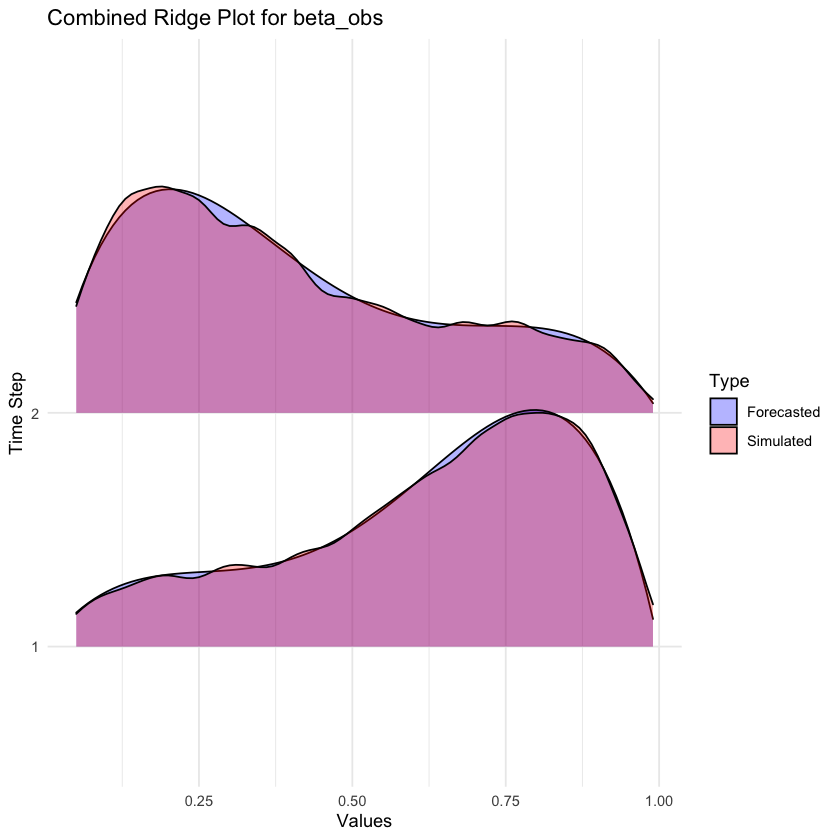

In [73]:
library(ggplot2)
obs <- "beta_obs" # Change this to the observation you want to plot
# Prepare data for combined ridge plot
if (!is.null(dim(evaluation_vals[[obs]]))) {
  x_vals <- unique(evaluation_vals[[obs]][1, ])
} else {
  bin_width <- evaluation_vals[[obs]][2] - evaluation_vals[[obs]][1]
  x_vals <- evaluation_vals[[obs]]
}

combined_data <- rbind(
  data.frame(
    x = rep(x_vals, n_forecast),
    time = rep(1:n_forecast, each = length(x_vals)),
    density = as.vector(forecasted_pdfs[[obs]])/max(as.vector(simulated_pdfs[[obs]])),
    type = "Forecasted"
  ),
  data.frame(
    x = rep(x_vals, n_forecast),
    time = rep(1:n_forecast, each = length(x_vals)),
    density = as.vector(simulated_pdfs[[obs]])/max(as.vector(simulated_pdfs[[obs]])),
    type = "Simulated"
  )
)

# Create combined ridge plot
ggplot(combined_data, aes(x = x, y = factor(time), height = density, fill = type)) +
  geom_ridgeline(alpha = 0.3) +
  scale_fill_manual(values = c("Forecasted" = "blue", "Simulated" = "red")) +
  labs(
    title = paste("Combined Ridge Plot for", obs),
    x = "Values",
    y = "Time Step",
    fill = "Type"
  ) +
  theme_minimal() +
  coord_cartesian(ylim = c(1, 3))


In [74]:
cbind(simulated_pdfs[["beta_obs"]], forecasted_pdfs[["beta_obs"]])

0.2642874,0.8638069,0.2750339,0.8934594
0.3098792,1.0117663,0.3164866,1.0277590
0.3491551,1.1492303,0.3539737,1.1489074
0.3812328,1.2757682,0.3877283,1.2575735
0.4066106,1.3920002,0.4179810,1.3544083
0.4269356,1.4979845,0.4449600,1.4400450
0.4442153,1.5923564,0.4688907,1.5150993
0.4608256,1.6714080,0.4899958,1.5801693
0.4786185,1.7302704,0.5084948,1.6358357
0.4980017,1.7680006,0.5246040,1.6826625
0.5179275,1.7894431,0.5385361,1.7211962


In [37]:
# Extract the first 1000 rows of "beta_obs" simulated data
beta_obs_data <- simulated_runs[["beta_obs"]][1:10000, 1]
beta_forecast <- forecasted_pdfs[["beta_obs"]][, 1]*100
beta_pdf <- simulated_pdfs[["beta_obs"]][, 1]*100

# Flatten the data into a single vector
beta_obs_vector <- as.numeric(beta_obs_data)

# Apply KDE from 0 to 1
kde <- density(beta_obs_vector, from = 0, to = 1, n = 100, kernel = "gaussian", bw = "SJ")

# Plot the KDE
plot(kde, main = "Kernel Density Estimation vs Forecasted PDF for beta_obs", xlab = "Values", ylab = "Density", col = "blue", lwd = 2)

# Overlay the forecasted PDF
lines(seq(0, 1, length.out = length(beta_forecast)), beta_forecast, col = "red", lwd = 2)
# Overlay the simulated PDF
lines(seq(0, 1, length.out = length(beta_pdf)), beta_pdf, col = "green", lwd = 2)
# Add a legend
legend("topright", legend = c("KDE", "Forecasted PDF"), col = c("blue", "red"), lwd = 2)

ERROR: Error in simulated_pdfs[["beta_obs"]][, 1]: incorrect number of dimensions


In [62]:
starting_state %*% tpm

0.225,0.775


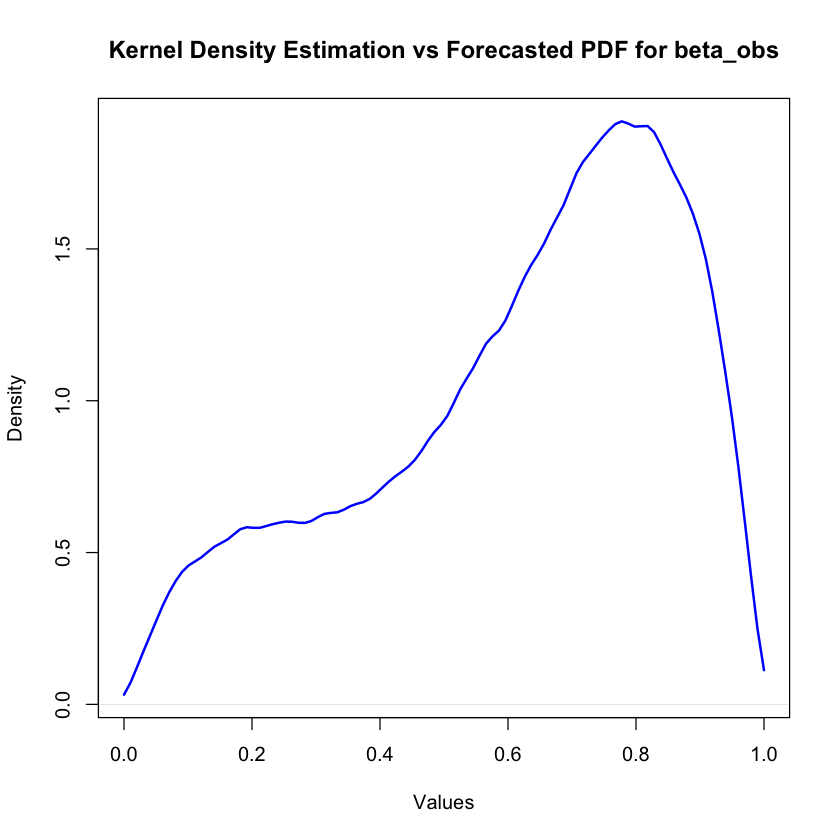

In [112]:
beta_samples <- rbeta(22500, shape1 = 2, shape2 = 5)
beta_samples <- c(beta_samples, rbeta(77500, shape1 = 5, shape2 = 2))

# Apply KDE from 0 to 1
kde <- density(beta_samples, from = 0, to = 1, n = 100, kernel = "gaussian", bw = "SJ")

# Plot the KDE
plot(kde, main = "Kernel Density Estimation vs Forecasted PDF for beta_obs", xlab = "Values", ylab = "Density", col = "blue", lwd = 2)


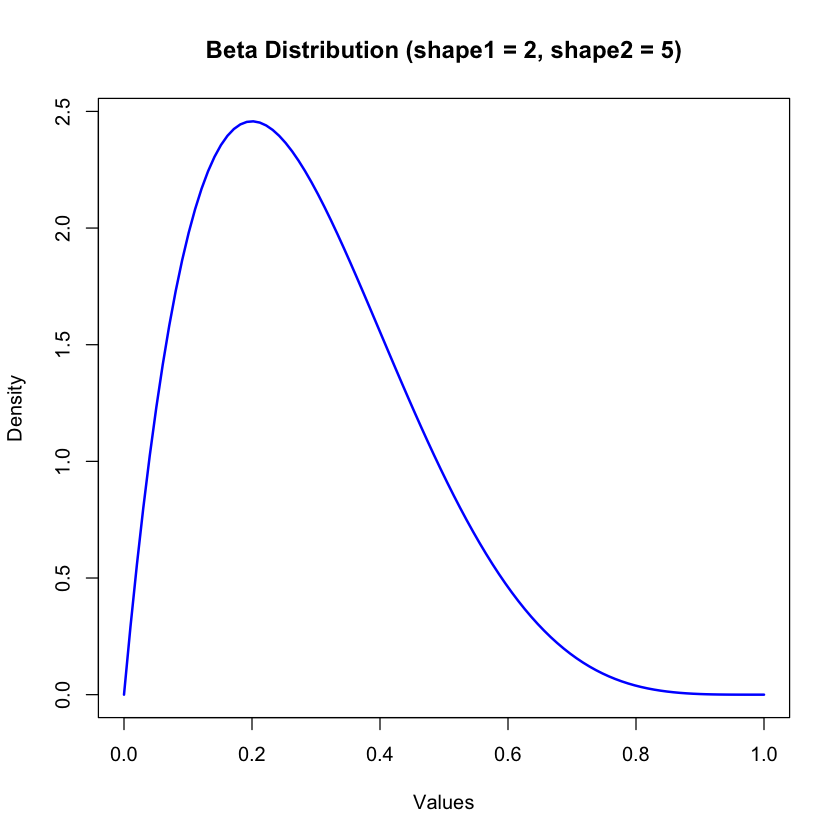

In [67]:
x <- seq(0, 1, length.out = 100)
y <- dbeta(x, shape1 = 2, shape2 = 5)

plot(x, y, type = "l", col = "blue", lwd = 2, 
  main = "Beta Distribution (shape1 = 2, shape2 = 5)", 
  xlab = "Values", ylab = "Density")